# Seaborn

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

------

## Distribution plots
```python
sns.distplot(data,kde=False,bins=30)

sns.jointplot(x='column name',y='column name',data=data,kind='scatter')
    # kind:['scatter','hex','reg','resid','kde']

sns.pairplot(data,hue='categorial column',palette='coolwarm')

sns.rugplot(data['column name'])

```


-------

## Categorical plots
```python
sns.barplot(x='categorical column',y='numerical column',data=data,estimator=function)
    # function can be anything: np.std, mean, ...
    
sns.countplot(x='categorical column',data=tips)

sns.boxplot(x='categorical column',y='numerical column', data=data,
            hue='another categorical column', palette='rainbow',orient='h')

sns.violinplot(x='categorical column',y='numerical column', data=data,
               hue='another categorical column', split=True, palette='Set1')

sns.stripplot(x='categorical column',y='numerical column', data=data,
              hue='another categorical column', palette='rainbow', split=True, jitter=True)

sns.swarmplot(x='categorical column',y='numerical column', data=data, palette="Set1", split=True)

sns.factorplot(x='categorical column',y='numerical column', data=data, kind='bar')
    # kind: ['bar','count','box','violin','strip','swarm']
```

---

## Matrix Plots
```python
sns.heatmap(data,cmap='palette',linecolor='color',linewidths=int, ,annot=False)

sns.clustermap(data,cmap='palette',standard_scale=1)

# colormap: ['magma','rainbow','coolwarm','Set1',...]
```

-------

## Grid
```python
my_grid= sns.PairGrid(data)
my_grid.map(plotting function)
#my_grid.map(plt.scatter)

my_grid = sns.FacetGrid(tips, col='categorical column',  row='another categorical column', 
                  hue='another categorical column')

my_grid = my_grid.map(plt.scatter, 'numerical column', 'another numerical column').add_legend()

```

---------

## Regression Plots
```python
sns.lmplot(x='numerical column', y='numerical column', data=tips, col=, hue=, palette=, aspect= ,height= )
```

----

## Style and Color
```python
plt.figure(figsize=(8,8))
sns.set_style('whitegrid')
    #set_style : {darkgrid, whitegrid, dark, white, ticks}
sns.set_context('talk',font_scale=int)
    #set_context : {paper, notebook, talk, poster}
sns.despine(left=True, top=True, right=True, bottom=False)
# Wen can us matplotlib.pyplot commands as well
g= sns.anyplot(....)
g.set_title('string')
g.set_xlabel('string')
g.set_xlim([low,high])
g.set_xticks([list])
g.set_xticklabels([list])

```
**Put the legend outside the figure:**
```
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
```

------

## save a plot
```python
my_plot= sns.barplot(x,y,data)
my_figure= my_plot.get_figure()
my_figure.savefig('filename.extention')
```

## Palette

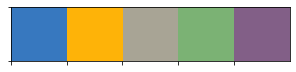

In [4]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

-----

## Distribution Plots

In [4]:
tips= sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


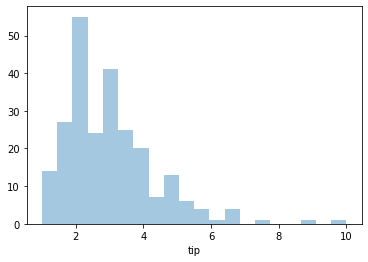

In [20]:
sns.distplot(tips['tip'],kde=False,bins=20)

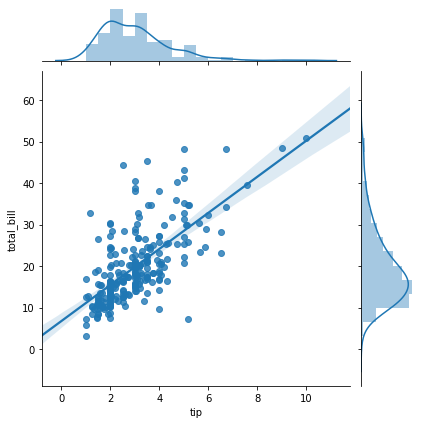

In [28]:
sns.jointplot(tips['tip'],tips['total_bill'],tips,kind='reg')

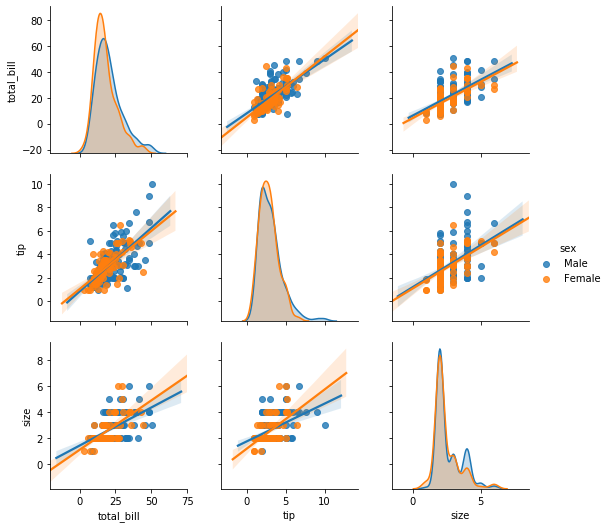

In [31]:
sns.pairplot(tips,hue='sex',kind='reg')

---

## Categorical plots

In [37]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

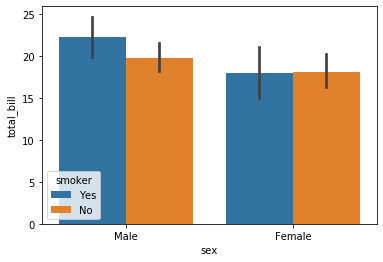

In [49]:
sns.barplot(x='sex',y='total_bill',data=tips,hue='smoker')

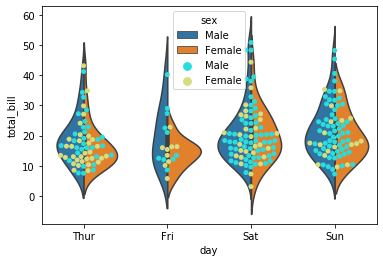

In [68]:
asd=sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)
asd=sns.swarmplot(x='day',y='total_bill',data=tips,hue='sex',palette='rainbow')

In [63]:
fig=asd.get_figure()
fig.savefig('violin.png')

## Matrix Plots

In [70]:
flights = sns.load_dataset('flights')
flights.columns

Index(['year', 'month', 'passengers'], dtype='object')

In [71]:
fp = flights.pivot_table(values='passengers',index='month',columns='year')
fp.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


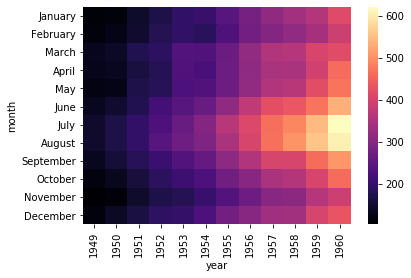

In [76]:
sns.heatmap(fp,cmap='magma')

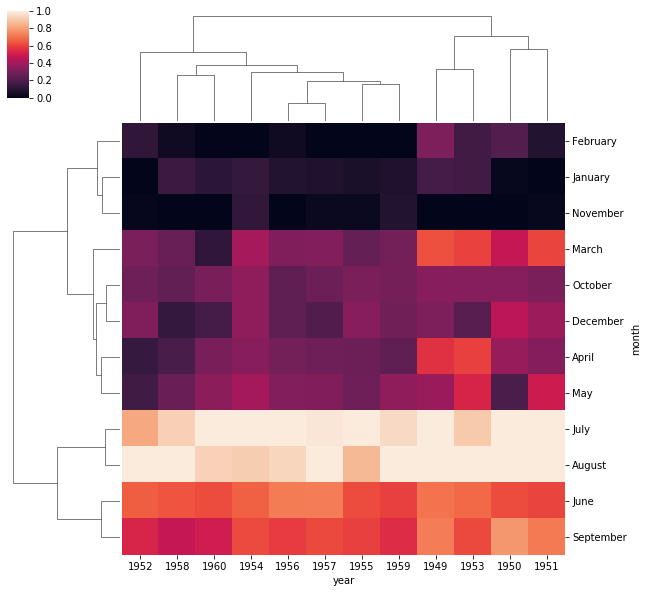

In [78]:
sns.clustermap(fp,standard_scale=1)

## Grid

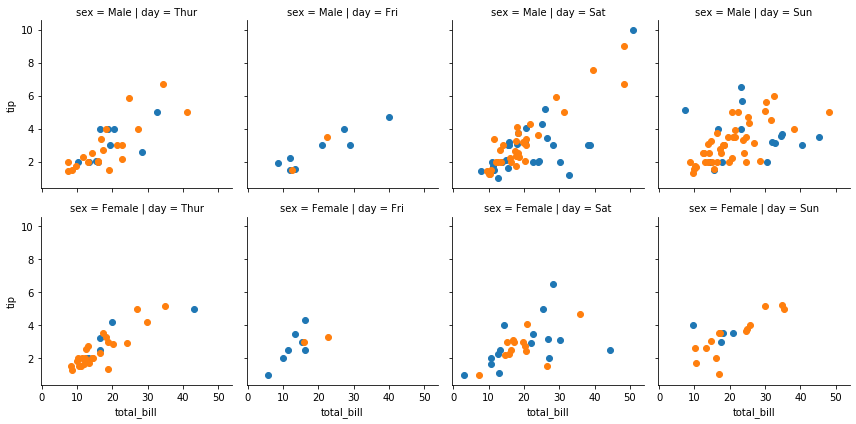

In [87]:
my_grid= sns.FacetGrid(tips,col='day',row='sex',hue='smoker')
my_grid.map(plt.scatter,'total_bill','tip')

## Regression Plot


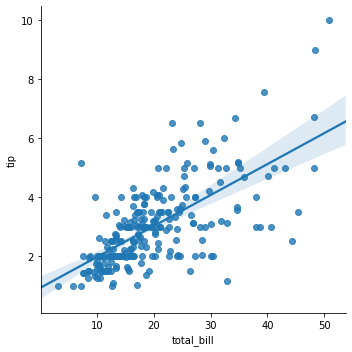

In [94]:
sns.lmplot(x='total_bill',y='tip',data=tips)

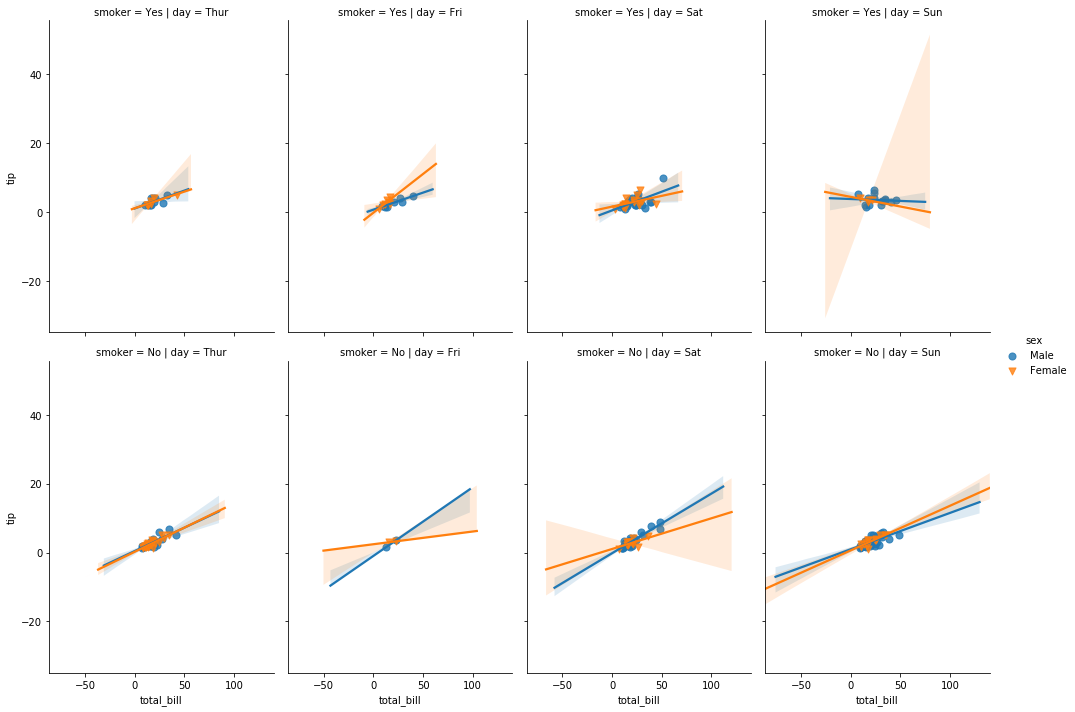

In [102]:
sns.lmplot(x='total_bill',y='tip',data=tips,row='smoker',col='day',hue='sex',
           markers=['o','v'], scatter_kws={'s':50},aspect=0.7,height=5)

## Style and Color

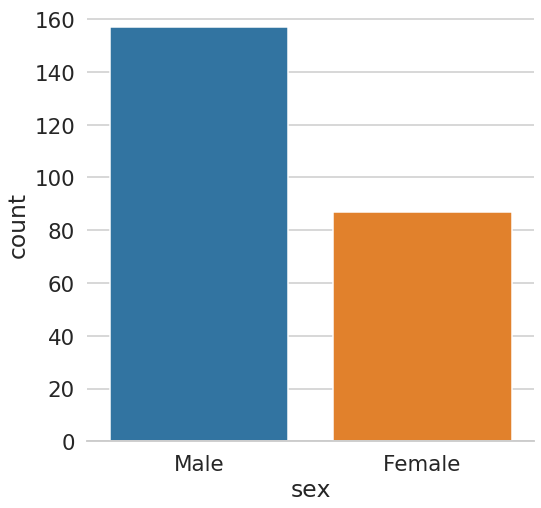

In [56]:
plt.figure(figsize=(8,8))
sns.set_style('whitegrid')
#set_style : {darkgrid, whitegrid, dark, white, ticks}
sns.set_context('talk',font_scale=1.3)
#set_context : {paper, notebook, talk, poster}
sns.countplot(x='sex',data=tips)
sns.despine(left=True)

## Temporarily setting figure style

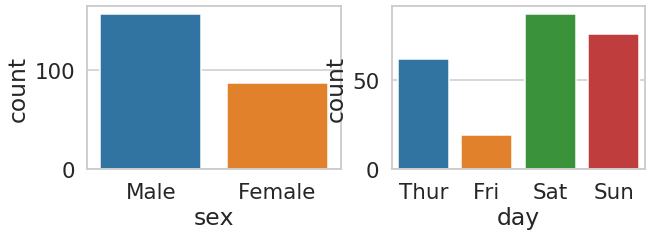

In [47]:
f = plt.figure(figsize=(10,3))
with sns.axes_style("whitegrid"):
    ax = f.add_subplot(1, 2, 1)
    sns.countplot(x='sex',data=tips)
ax = f.add_subplot(1, 2, 2)
sns.countplot(x='day',data=tips)